In [1]:
"""
Script to test the SAMRAI data reader for data from all levels.
"""

from floatpy.readers import samrai_reader
import numpy

%matplotlib inline
from matplotlib import pyplot as plt


In [2]:
"""
Get the SAMRAI data reader.
"""

data_reader = \
    samrai_reader.SamraiDataReader('/mnt/b9e17de4-9838-4425-ad4c-dc2ad3e41075/manlong/LANL_summer/' + \
                                  '2D_Poggi_Richtmyer_Meshkov_instability/2D_Poggi_Richtmyer_Meshkov_instability_1/' + \
                                  'viz_2D_Poggi_Richtmyer_Meshkov_instability/', \
                                  periodic_dimensions = (False, True), \
                                  upsampling_method = 'sixth_order_Lagrange')


In [3]:
"""
Try to set a new step.
"""

steps = data_reader.steps
data_reader.setStep(steps[-1])


In [4]:
"""
Try to get the full domain shape refined to the highest level.
"""

domain_shape = data_reader.getRefinedDomainSize()

print domain_shape


(5000, 500)


In [5]:
"""
Try to read a sub-domain of density and velocity data.
"""

var_names = ('density', 'velocity')
num_ghosts = (0, 4)

domain_shape = numpy.asarray(domain_shape)
lo_subdomain = domain_shape*3/4
hi_subdomain = domain_shape - numpy.ones(2, dtype = numpy.int)

lo_subdomain = tuple(lo_subdomain)
hi_subdomain = tuple(hi_subdomain)

data_reader.sub_domain = (lo_subdomain, hi_subdomain)

data_reader.readCombinedDataInSubdomainFromAllLevels( \
    var_names, num_ghosts)

x_coords, y_coords = data_reader.getCombinedCoordinatesInSubdomainFromAllLevels(num_ghosts)

data_rho = data_reader.getData('density')
data_vel = data_reader.getData('velocity')

print data_rho.shape
print data_vel.shape

print numpy.isfortran(data_rho)
print numpy.isfortran(data_vel)


(1250, 133, 1)
(1250, 133, 2)
True
True


/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


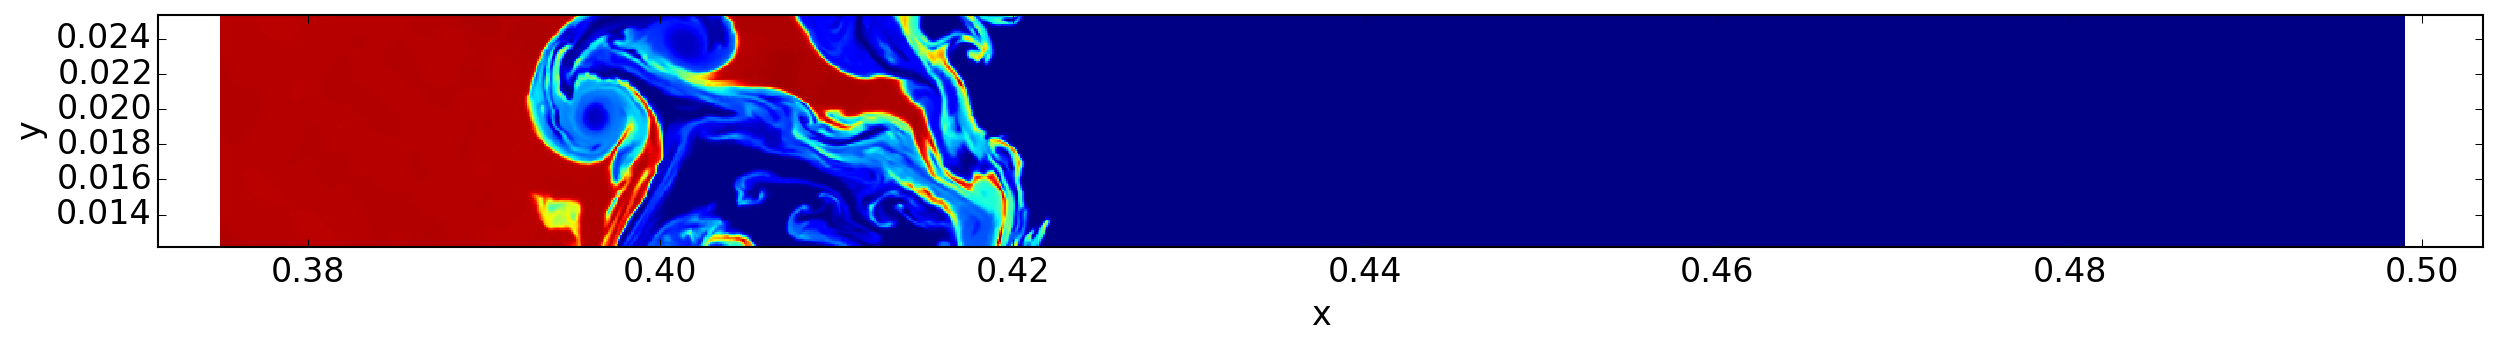

In [6]:
"""
Plot the level of data. (NAN for non-existing data)
"""

data_masked = numpy.ma.masked_where(numpy.isnan(data_rho), data_rho)
X, Y = numpy.meshgrid(x_coords, y_coords)

fig=plt.figure(figsize=(20, 2), dpi= 150)

plt.pcolormesh(X, Y, data_masked[:, :, 0].T)

plt.axes().set_aspect('equal', 'datalim')
plt.xlim([x_coords[0], x_coords[-1]])
plt.ylim([y_coords[0], y_coords[-1]])
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
